In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [3]:
camvid = untar_data(URLs.CAMVID)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [4]:
path_vidFrames = camvid/'commaImages'

In [5]:
camvid.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/predictedImages'),
 PosixPath('/home/jupyter/.fastai/data/camvid/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/base92.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages')]

In [6]:
# All commaAI images that are segmented are going to be in here 
path_Predicted = camvid/'predictedImages'

In [8]:
# import cv2
# vidcap = cv2.VideoCapture('/home/jupyter/.fastai/data/camvid/commaImages/train.mp4')

#/home/jupyter/.fastai/data/camvid/commaImages

In [30]:
# success,image = vidcap.read()

In [9]:
# count = 0

In [1]:
# while success:
#     # save frame as jpg file
#     cv2.imwrite("frame%d.jpg" % count, image)

#     success, image = vidcap.read()
#     print("read a new frame: ", success)
#     count += 1

In [ ]:
# /home/jupyter/.fastai/data/commaImages

In [7]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)

In [8]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [9]:
import skimage
import time

In [12]:
# get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [10]:
name2id = {v:k for k,v in enumerate(codes)}

In [11]:
name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'SUVPickupTruck': 22,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [13]:
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [14]:
frames = get_image_files(path_vidFrames)

### Test


In [15]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_01680.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_06630.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_009120.png')]

In [16]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_009720_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0006R0_f03930_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_01110_P.png')]

In [17]:
img_f = fnames[0]; img_f

PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_01680.png')

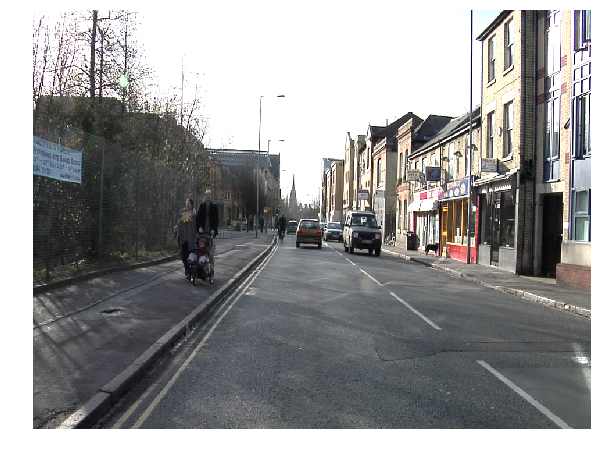

In [18]:
img = open_image(img_f)
img.show(figsize=(10, 10))

In [19]:
img.shape

torch.Size([3, 720, 960])

In [20]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

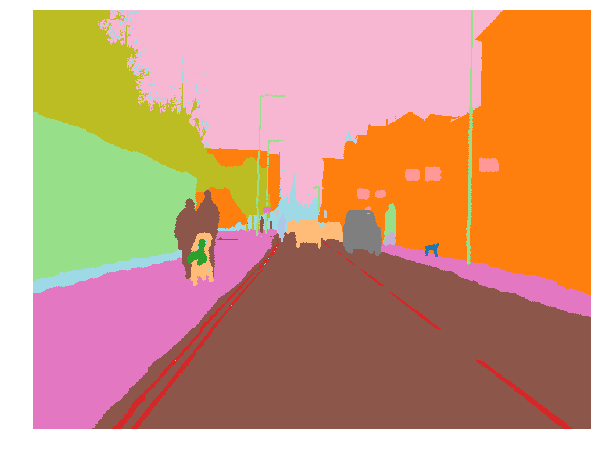

In [21]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(10, 10), alpha=1)

In [22]:
src_size = np.array(mask.shape[1:])
src_size, mask.data

(array([720, 960]), tensor([[[26, 26, 26,  ...,  4,  4,  4],
          [26, 26, 26,  ...,  4,  4,  4],
          [26, 26, 26,  ...,  4,  4,  4],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17]]]))

In [23]:
src_size

array([720, 960])

In [24]:
size = src_size//2
size

array([360, 480])

In [26]:
??SegmentationItemList

# Predict Images

In [25]:
learn= load_learner(camvid)

In [26]:
frames = get_image_files(path_vidFrames)

In [27]:
# path_vidFrames.ls()

In [28]:
frames[:5]

[PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame7485.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame17542.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame19829.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame6166.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame16157.jpg')]

In [52]:
img = open_image(path_vidFrames/'frame1015.jpg')

## Predict all your images
- then store them in a list

In [53]:
count = 1
arr = []
while count < 2:
    img = open_image(path_vidFrames/f'frame{count}.jpg')
    
    print(img)
    
    pred = learn.predict(img)
    arr.append(pred)
    count += 1
    
    # get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

Image (3, 480, 640)


None


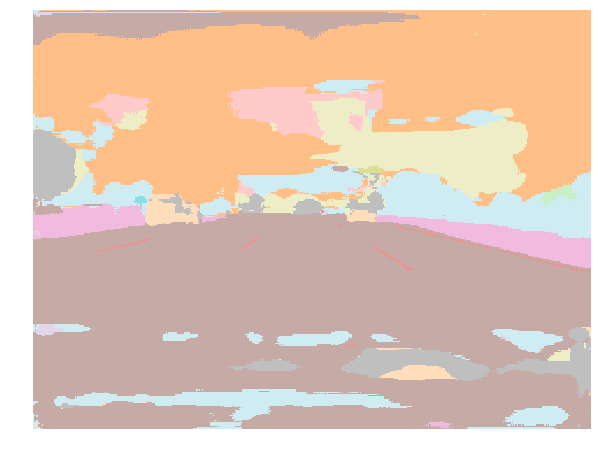

In [55]:
for i in arr:
    print(i[0].show(figsize=(10,10)))

In [30]:
img2 = open_image(img_f)

In [31]:
pred2 = learn.predict(img2)

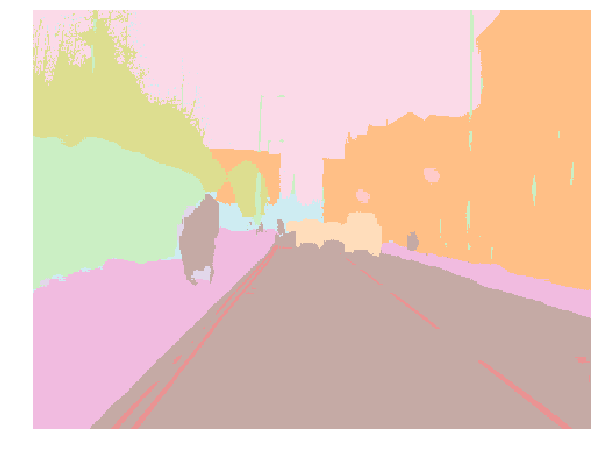

In [32]:
pred2[0].show(figsize=(10,10))

In [33]:
# predict single image 
prediction = learn.predict(img)

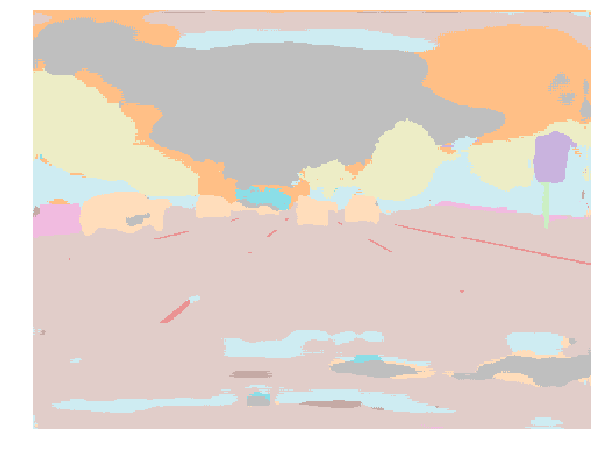

In [34]:
prediction[0].show(figsize=(10,10))

In [35]:
prediction[0].shape

torch.Size([1, 360, 480])

In [36]:
prediction[1].shape

torch.Size([1, 360, 480])

In [44]:
type(prediction[0])

fastai.vision.image.ImageSegment

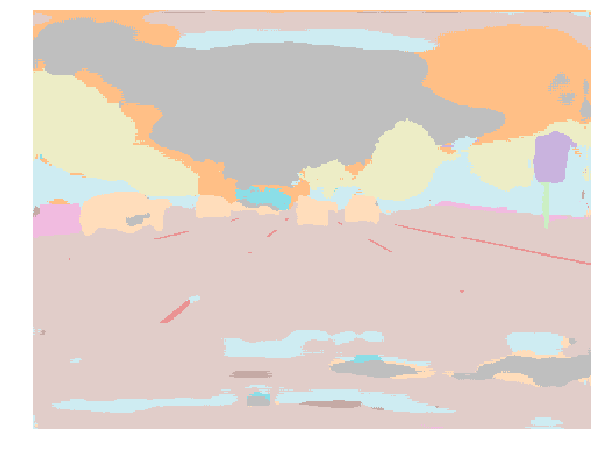

In [48]:
prediction[0].show(figsize=(10,10))

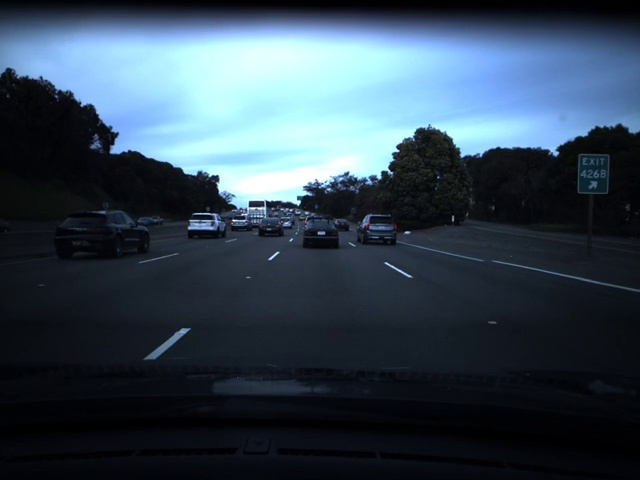

In [35]:
img

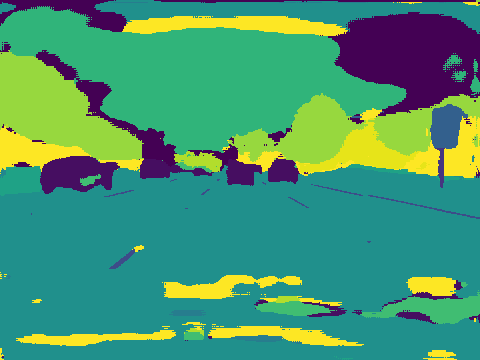

In [36]:
prediction[0].brightness()

In [38]:
type(prediction)

tuple

In [55]:
prediction.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [39]:
??img.lighting

In [40]:
newImg = open_image(path_vidFrames/'frame200.jpg')

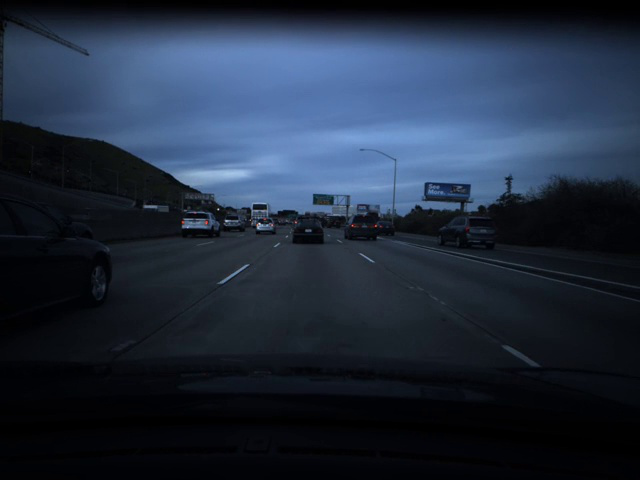

In [41]:
newImg

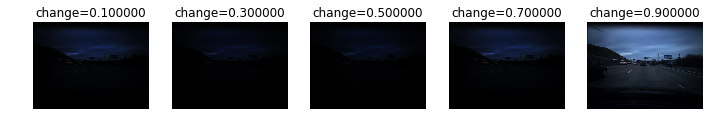

In [42]:
fig, axs = plt.subplots(1, 5, figsize=(12,4))
for change, ax in zip(np.linspace(0.1, 0.9,5), axs):
    brightness(newImg, change).show(ax=ax, title=f'change={change:1f}')

In [43]:
i = brightness(newImg, 0.9)

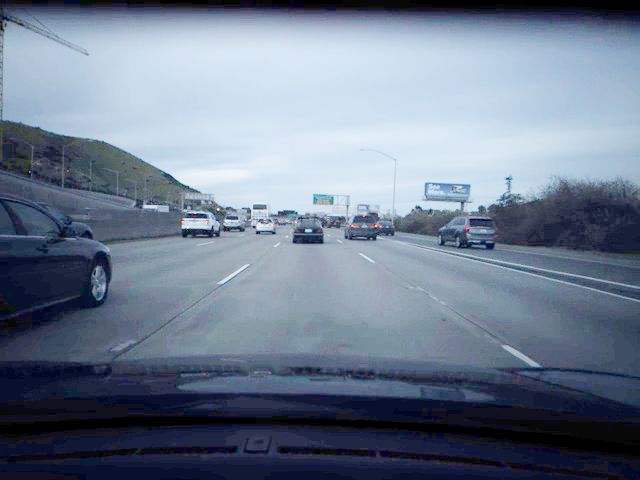

In [44]:
i

In [45]:
p = learn.predict(i)

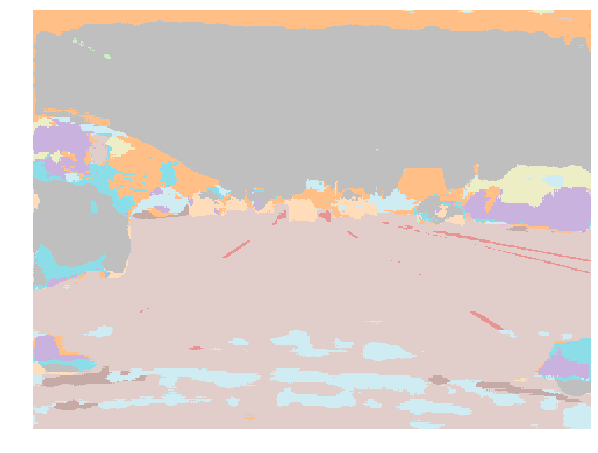

In [46]:
# prediction[0].show(figsize=(10,10))
p[0].show(figsize=(10,10))

In [47]:
newImg = open_image(path_vidFrames/'frame201.jpg')

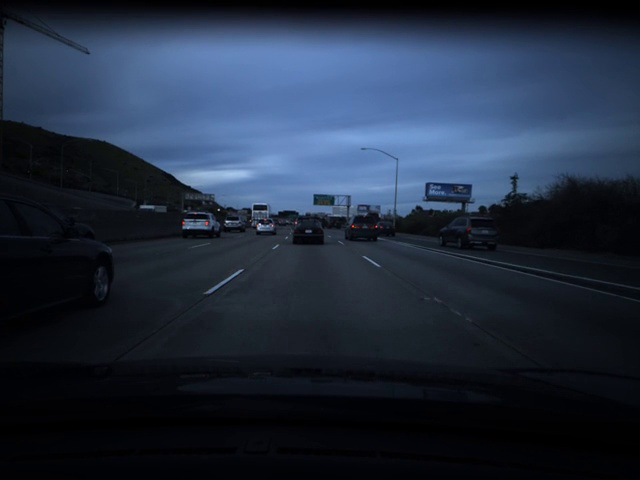

In [48]:
newImg

In [49]:
newI2 = newImg.clone()

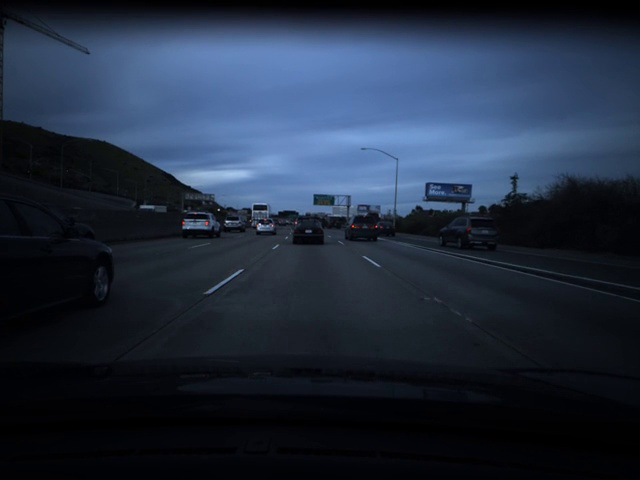

In [50]:
newI2

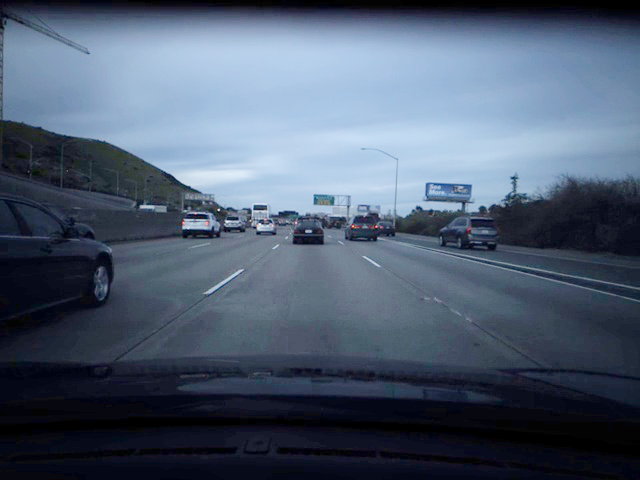

In [55]:
brightness(newI2, 0.8); newI2

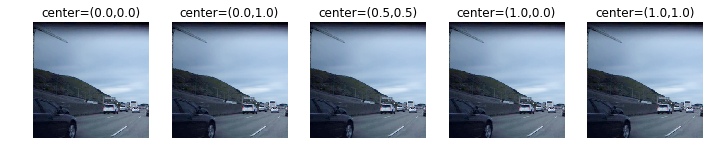

In [59]:
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

for center, ax in zip([[0.,0.], [0.,1.],[0.5,0.5],[1.,0.], [1.,1.]], axs):
    crop(newI2, 300, *center).show(ax=ax, title=f'center=({center[0]},{center[1]})')

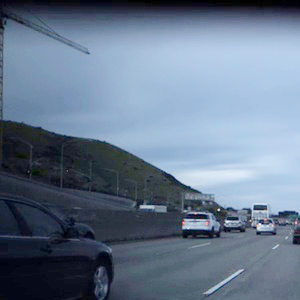

In [65]:
newI2

In [71]:
c = 0.5

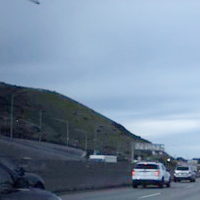

In [74]:
crop(newI2, 200, c);newI2